# DLF: 02 Basics

Task: Implement a simple neural network with `numpy` only:
* Use the digits dataset (`from sklearn.datasets import load_digits`).
* 1 hidden layer with 20 neurons
* Sigmoid activation function
* randomly init weights (why?)
* implement at least a single forward pass through the network
* batch-size: 32
* try to use vector ops

Note: The dataset has 10 classes:
  * 1-hot encode them,
  * or do binary classification of `5` vs `7`

## Imports

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_digits

from matplotlib import pyplot as plt
%matplotlib inline

## Fiddlings

### numpy vectors / arrays

In [2]:
x = np.array([[1,2,3]])

In [3]:
x = np.array([1,2,3]).reshape(-1, 1)
x

array([[1],
       [2],
       [3]])

In [4]:
x.T

array([[1, 2, 3]])

### python for loops vs vector ops

In [5]:
X = np.random.randn(10000, 64)  # approx same dims as our dataset later... (~10k samples, 64px)
W = np.random.randn(64, 20)  # each of the 64 inputs go to one of 20 neurons in the 1st hidden layer

In [6]:
Z_loop = np.zeros([10000, 20])
for i in range(10000):
    for j in range(20):
        for k in range(64):
            Z_loop[i, j] += X[i, k] * W[k, j]

In [7]:
%%timeit
Z_loop = np.zeros([10000, 20])
for i in range(10000):
    for j in range(20):
        for k in range(64):
            Z_loop[i, j] += X[i, k] * W[k, j]

4.15 s ± 48.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
Z_vec = np.dot(X, W)

In [9]:
%%timeit
Z_vec = np.dot(X, W)

4.36 ms ± 694 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
# calculates the same?
np.sum((Z_vec - Z_loop)**2 > 0.0000000000001)

0

### playing around with softmax

In [11]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)

In [12]:
np.round(softmax([[10, 9, 9]]), 2)

array([[0.58, 0.21, 0.21]])

In [13]:
x = np.random.randn(1, 5)
x

array([[-1.25331661, -0.14296762,  0.77301799, -1.52745534,  1.12005415]])

In [14]:
softmax(x)

array([[0.04326123, 0.1313159 , 0.3281896 , 0.03288834, 0.46434493]])

## dataset prep

In [15]:
digits = load_digits()
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
digits.data.shape

(1797, 64)

In [17]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

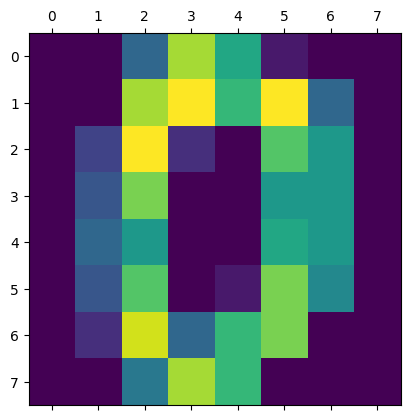

In [18]:
plt.matshow(digits.images[0])
plt.show()

In [19]:
np.max(digits.data)

16.0

In [20]:
# normalize input range to [0, 1]
X = digits.data / 16
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [21]:
X.shape

(1797, 64)

In [22]:
INPUT_DIM = X.shape[1]

In [23]:
onehot = OneHotEncoder(sparse=False)
Y = onehot.fit_transform(digits.target.reshape(-1, 1))
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
Y.shape

(1797, 10)

In [25]:
OUTPUT_DIM = Y.shape[1]

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=4711, test_size=.1)

In [27]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1617, 64), (180, 64), (1617, 10), (180, 10))

## Simple 1 Hidden Layer NN

Let's create a simple NN with input layer, 1 hidden layer and output layer.

In [28]:
HIDDEN_UNITS = 20

### Init weights

In [29]:
W1 = np.random.randn(INPUT_DIM, HIDDEN_UNITS)  # from input to hidden layer
W2 = np.random.randn(W1.shape[1], OUTPUT_DIM)  # from hidden to output layer

B1 = np.random.randn(1, W1.shape[1])  # biases for hidden layer neurons
B2 = np.random.randn(1, W2.shape[1])  # biases for output layer neurons

### Forward pass

In [30]:
# get the first batch of our train data (should normally also shuffle!)
BATCH_SIZE = 32
X_batch, Y_batch = X_train[0:BATCH_SIZE], Y_train[0:BATCH_SIZE]

In [31]:
# hidden layer inputs
Z1 = np.dot(X_batch, W1) + B1
Z1.shape

(32, 20)

In [32]:
# activation functions

# def relu(x):
#     return np.maximum(0, x)

# def softmax(x):
#     return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [33]:
# hidden layer output activations
A1 = sigmoid(Z1)
A1.shape

(32, 20)

In [34]:
# output layer inputs
Z2 = np.dot(A1, W2) + B2
Z2.shape

(32, 10)

In [35]:
# output layer activations
A2 = sigmoid(Z2)
Y_hat = A2
A2.shape

(32, 10)

In [36]:
# so for our 32 samples in the batch (rows) we now have the output
# activations for each of the 10 output neurons (columns)
np.round(Y_hat, 2)

array([[0.27, 0.73, 0.04, 0.55, 0.01, 0.47, 0.36, 0.03, 0.93, 0.02],
       [0.19, 0.97, 0.07, 0.64, 0.03, 0.29, 0.31, 0.02, 0.77, 0.01],
       [0.14, 0.6 , 0.01, 0.8 , 0.05, 0.83, 0.89, 0.03, 0.89, 0.02],
       [0.16, 0.56, 0.01, 0.81, 0.06, 0.43, 0.86, 0.01, 0.92, 0.01],
       [0.15, 0.57, 0.  , 0.94, 0.04, 0.72, 0.81, 0.01, 0.87, 0.01],
       [0.04, 0.71, 0.03, 0.63, 0.01, 0.39, 0.76, 0.02, 0.89, 0.02],
       [0.07, 0.84, 0.01, 0.86, 0.1 , 0.18, 0.76, 0.02, 0.97, 0.02],
       [0.28, 0.79, 0.01, 0.87, 0.05, 0.37, 0.73, 0.01, 0.88, 0.01],
       [0.08, 0.94, 0.06, 0.72, 0.08, 0.27, 0.77, 0.02, 0.76, 0.01],
       [0.2 , 0.76, 0.01, 0.91, 0.06, 0.71, 0.87, 0.07, 0.85, 0.03],
       [0.31, 0.94, 0.05, 0.73, 0.05, 0.55, 0.73, 0.01, 0.74, 0.02],
       [0.02, 0.96, 0.01, 0.8 , 0.03, 0.46, 0.97, 0.02, 0.89, 0.03],
       [0.08, 0.75, 0.01, 0.89, 0.05, 0.36, 0.87, 0.01, 0.89, 0.01],
       [0.51, 0.95, 0.  , 0.93, 0.13, 0.84, 0.88, 0.02, 0.8 , 0.01],
       [0.25, 0.92, 0.03, 0.82, 0.

In [37]:
Y_batch

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

### Error calculation

In [38]:
Errors = Y_hat - Y_batch
np.round(Errors, 1)

array([[ 0.3,  0.7,  0. ,  0.5, -1. ,  0.5,  0.4,  0. ,  0.9,  0. ],
       [ 0.2,  1. ,  0.1,  0.6, -1. ,  0.3,  0.3,  0. ,  0.8,  0. ],
       [ 0.1,  0.6,  0. ,  0.8,  0. ,  0.8,  0.9, -1. ,  0.9,  0. ],
       [ 0.2,  0.6,  0. ,  0.8,  0.1,  0.4,  0.9,  0. , -0.1,  0. ],
       [ 0.2,  0.6, -1. ,  0.9,  0. ,  0.7,  0.8,  0. ,  0.9,  0. ],
       [ 0. , -0.3,  0. ,  0.6,  0. ,  0.4,  0.8,  0. ,  0.9,  0. ],
       [ 0.1,  0.8,  0. ,  0.9, -0.9,  0.2,  0.8,  0. ,  1. ,  0. ],
       [ 0.3, -0.2,  0. ,  0.9,  0.1,  0.4,  0.7,  0. ,  0.9,  0. ],
       [ 0.1, -0.1,  0.1,  0.7,  0.1,  0.3,  0.8,  0. ,  0.8,  0. ],
       [ 0.2,  0.8,  0. ,  0.9,  0.1,  0.7, -0.1,  0.1,  0.8,  0. ],
       [ 0.3,  0.9,  0. ,  0.7,  0. ,  0.5,  0.7,  0. ,  0.7, -1. ],
       [ 0. ,  1. ,  0. ,  0.8,  0. ,  0.5, -0. ,  0. ,  0.9,  0. ],
       [ 0.1, -0.3,  0. ,  0.9,  0.1,  0.4,  0.9,  0. ,  0.9,  0. ],
       [ 0.5,  1. ,  0. , -0.1,  0.1,  0.8,  0.9,  0. ,  0.8,  0. ],
       [ 0.2,  0.9,  0. ,  0.8,  0

### Backpropagation

In [39]:
# next time